In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wave

%matplotlib inline

> This code accepts number of points in the signal
>
> From where the value of n starts
>
> And also accepts input signal.

In [2]:
# number of samples in a the signal
M=int(input("Enter number of samples in the signal: "))
# initial value of n
N=int(input("Enter the initial value of n where you want to start: "))
# input signal 
lst=[]
for i in range(M):
    ele = input('Please Enter ' + str(N + i) + ' Input: ')
    ele = ele.replace(" ", "")
    lst.append(complex(ele))
lst = np.array(lst)
lst = np.vstack((lst, np.linspace(N, N+M, M)))

if np.isreal(lst[0, :]).all():
    signal_type = 'real'  
else: 
    signal_type= 'complex'

Enter number of samples in the signal: 3
Enter the initial value of n where you want to start: -1
Please Enter -1 Input: 2+6j
Please Enter 0 Input: 2-6j
Please Enter 1 Input: 685


> When input signal is real this code is going to plot x[n] versus n graph.
>
> When input signal is complex this code is going to plot both magnitude of signal and phase of signal.

/usr/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


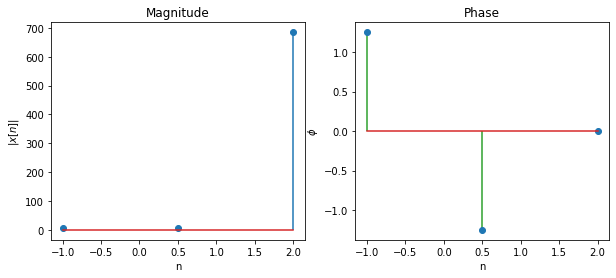

In [3]:
# samples of the signal
#n=[i for i in range(N,N+M)]
if(signal_type=='real'):
    # stemp plot x[n] versus n
    plt.stem(lst[1, :],lst[0, :])
    # label axes
    plt.xlabel('n')
    plt.ylabel('x[n]')
    # label plot
    plt.title('Discrete real signal')
    # show the plot
    plt.show()
    
# Magnitude of input complex signal
Mag=[]
for i in range(M):
    mag=np.sqrt((lst[0, i].real)**2+(lst[0, i].imag)**2)
    Mag.append(mag)
    
if(signal_type=='complex'):
    plt.rcParams['figure.figsize'] = [10, 4]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    # stemp plot |x[n]| versus n
    ax1.stem(lst[1, :],Mag)
    # label axes
    ax1.set(xlabel = 'n', ylabel='$|x[n]|$')
    # label plot
    ax1.title.set_text('Magnitude')
    
    #stemp of phase(x[n]) versus n
    ax2.stem(lst[1, :],np.angle(lst[0, :]), 'tab:green')
    # label axes
    ax2.set(xlabel = 'n', ylabel=r'$\phi$')
    # label plot
    ax2.title.set_text('Phase')

#### Discrete time impulse response is given as:
$$ \delta[n-a]= \begin{cases} 
                      1 & n=a \\
                      0 & n \not= a 
                 \end{cases} $$
              
* The below function will generate discrete time impulse response

In [4]:
# function to generate discrete time impulse response d[n-a]
def unit_impulse(a,n):
    delta=[]
    for i in n:
        if i==a:
            delta.append(1)
        else:
            delta.append(0)
    delta = np.array(delta)
    DELTA = np.vstack((delta, n))
    return DELTA

#### Unit step response is given as:
$$ u[n-a]= \begin{cases} 
                      1 & n\geq a \\
                      0 & n \lt a 
                 \end{cases} $$
              
* The below function will generate unit step response

In [5]:
# function to generate unit step response u[n-a]
def unit_step(a,n):
    unit=[]
    for i in n:
        if i<a:
            unit.append(0)
        else:
            unit.append(1)
    unit = np.array(unit)
    UNIT = np.vstack((unit, n))
    return UNIT


#### exponential response is given as:
$$ x[n-a]= e^{n-a} $$
              
* The below function will generate exponential response

In [6]:
# function to generate exponential response e**(n-a)
def exponential(a,n):
    expo=[]
    for i in n:
        expo.append(np.exp(i-a))
    expo = np.array(expo)
    EXPO = np.vstack((expo, n))
    return EXPO

### Complex sinusoidal signal is given as:
$$ x[n]=e^{(\sigma + jw_0)n} $$
* The below function will generate complex sinusoidal signal

In [7]:
# function for real part and imaginary part of complex signal 
def complex_signal(sigma, w_0, n):
    e_jw = np.exp((sigma + 1j*w_0)*n)
    E_JW = np.vstack((e_jw, n))
    return E_JW

* let us assume that, 
  > there is no horizontal transformation of signals i,e,. a=0.
  >
  > periodicity of complex sinusoidal signal as 1.
  >
  > Number of samples in the signal are 15.

In [8]:
# let us assume that no function is shifted
a=0
# periodicity of complex signal
N=1
# frequency of complex signal
w_0=(2*np.pi)/N
# number of samples in the signal
M=15
# upper limit
UL=int(M/2)
# lower limit
LL=-UL
if M%2==0:
    n=np.arange(LL,UL,1)
else:
    n=np.arange(LL,UL+1,1)

* let us assume that, 
  > there is no horizontal transformation of signals i,e,. a=0.
  >
  > periodicity of complex sinusoidal signal as 1.
  >
  > Number of samples in the signal are 15.

In [9]:
# let us assume that no function is shifted
a=0
# periodicity of complex signal
N=10
# frequency of complex signal
w_0=(2*np.pi)/N
# number of samples in the signal
M=15
# upper limit
UL=int(M/2)
# lower limit
LL=-UL
if M%2==0:
    n=np.arange(LL,UL,1)
else:
    n=np.arange(LL,UL+1,1)

### The below code is to plot delta function

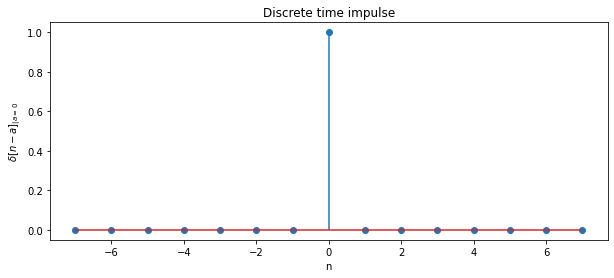

In [10]:
# unit impulse function 
d=unit_impulse(a,n)
# stemp plot delta[n-a] versus n
plt.stem(d[1, :],d[0, :])
# label axes
plt.xlabel('n')
plt.ylabel('$\delta[n-a]_{|a=0}$')
# label plot
plt.title('Discrete time impulse')
# show the plot
plt.show()

### The below code is to plot unit step function

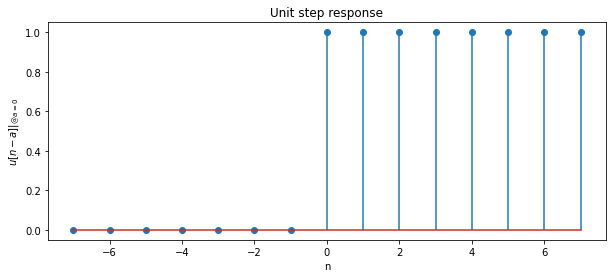

In [11]:
# unit step function
u=unit_step(a,n)
# stemp plot u[n-a] versus n
plt.stem(u[1, :],u[0, :])
# label axes
plt.xlabel('n')
plt.ylabel(r'$u[n-a]|_{@a=0}$')
# label plot
plt.title('Unit step response')
# show the plot
plt.show()

### The below code is to plot exponential signal

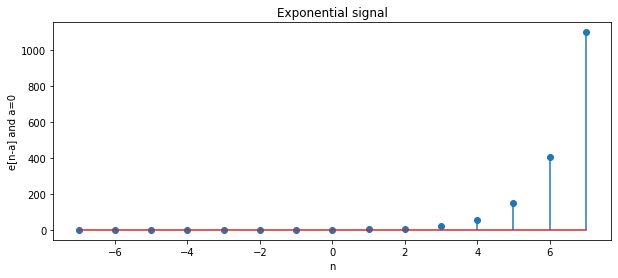

In [12]:
# exponential function
e=exponential(a,n)
# stemp plot exp[n-a] versus n
plt.stem(e[1, :],e[0, :])
# label axes
plt.xlabel('n')
plt.ylabel('e[n-a] and a=0')
# label plot
plt.title('Exponential signal')
# show the plot
plt.show()

### The below code is to plot complex sinusoidal signal

/usr/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


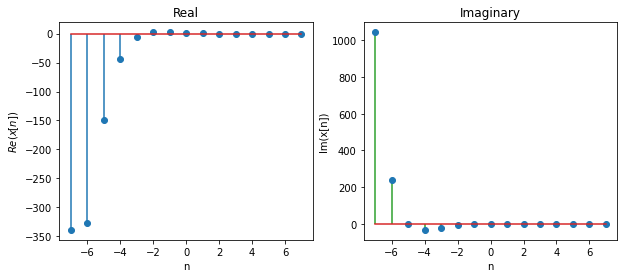

In [13]:
sigma = -1
com_signal = complex_signal(sigma, w_0, n)
# print(com_signal)
plt.rcParams['figure.figsize'] = [10, 4]
fig, (ax1, ax2) = plt.subplots(1, 2)
# stemp plot |x[n]| versus n
ax1.stem(com_signal[1, :],np.real(com_signal[0, :]))
# label axes
ax1.set(xlabel = 'n', ylabel='$Re(x[n])$')
# label plot
ax1.title.set_text('Real')

#stemp of phase(x[n]) versus n
ax2.stem(com_signal[1, :],np.imag(com_signal[0, :]), 'tab:green')
# label axes
ax2.set(xlabel = 'n', ylabel='Im(x[n])')
# label plot
ax2.title.set_text('Imaginary')

In [14]:
# This is the algorithm for computing DTFT of given signal
# The parameters for this Algorithm is a signal of shape (2, N) or  (N, )
# it has some default parameters like lower limit, higher limit and Number of points for omega axis

def dtft(signal, low_lim=-1*np.pi, high_lim=np.pi, N=101, endpoints=False):
    w = np.linspace(low_lim, high_lim, N, endpoint=endpoints)                  #Array of omega values
    e_jw = np.exp(w*1j)                                                    #computes e^{jw}
    
    # Creates a dictnationry to store dtft, Magnitude, Phase and omega
    dtft = dict()        
    # Creates a empty array for dtft
    dtft['complex'] = np.zeros(N, dtype=complex) 
    # Assiging omega values 
    dtft['omega'] = w
    
    # The following conditional statements are for checking whether the input(signal) is been provided with 
    # time stamps
    if signal.shape[0] == 2:
        for i in range(signal.shape[1]):
            dtft['complex'] += signal[0, i]*np.power(e_jw, -1*signal[1, i])
    else:
        for i in range(signal.shape[0]):
            dtft['complex'] += signal[i]*np.power(e_jw, -1*i)

    # Rounds-off the result upto 4 decimal places
    dtft['complex'] = np.round(dtft['complex'], decimals=4)
    # Finds the magnitude of the dtft computed above.
    dtft['magnitude'] = np.absolute(dtft['complex'])
    # Finds the phase of dtft in radians which lies in the range[-pi, pi]
    dtft['phase'] = np.angle(dtft['complex'], deg=0)
    return dtft


# This below function flips the w axis 
# Input:- X(e^jw) 
# Output:- X(e^-jw)
def negate_dtft(dtft):
    dtft['complex'] = np.flip(dtft['complex'])
    dtft['magnitude'] = np.absolute(dtft['complex'])
    dtft['phase'] = np.angle(dtft['complex'], deg=0)
    return dtft

# This below function finds the conjugate of dtft.
# Input:- X(e^jw) 
# Output:- X*(e^jw)
def conjugate(dtft):
    dtft['complex'] = np.conj(dtft['complex']) 
    dtft['phase'] = -1*dtft['phase']
    return dtft

In [15]:
# This function is used for plotting Real part, Imaginary part, Magnitude and Phase for a given DTFT

def dtft_plotter(dtft, title=None):
    plt.rcParams['figure.figsize'] = [10, 8]
    
    fig, ax = plt.subplots(2,2)
    
    if title != None:
        fig.suptitle(title, fontweight="bold")
    ax[0, 0].title.set_text('Real Part')
    ax[0, 0].plot(dtft['omega'], np.real(dtft['complex']))
    ax[0, 0].set(ylabel='$Re\{X(e^{j \omega})\}$')

    ax[0, 1].title.set_text('Imaginary Part')
    ax[0, 1].plot(dtft['omega'], np.imag(dtft['complex']), 'tab:red')
    ax[0, 1].yaxis.tick_right()
    ax[0, 1].set(ylabel='$Im\{X(e^{j \omega})\}$')

    ax[1, 0].title.set_text('Magnitude')
    ax[1, 0].plot(dtft['omega'], dtft['magnitude'], 'tab:orange')
    ax[1, 0].set(xlabel='$\omega$', ylabel='$|X(e^{j \omega})|$')

    ax[1, 1].title.set_text('Phase')
    ax[1, 1].plot(dtft['omega'], dtft['phase'], 'tab:green')
    ax[1, 1].yaxis.tick_right()        
    ax[1, 1].set(ylabel='$\phi$')

The below cell is for **Question 3**  
>Please fill the variable 'input' for obtaining Magnitude and Phase plots of its DTFT

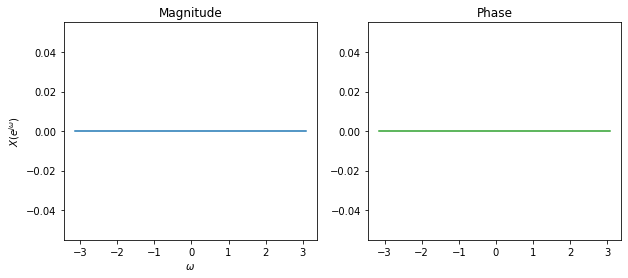

In [16]:
#Please provide the input signal in the array given below to compute DTFT and plot it.
input = []

input = np.array(input)

dtft_signal = dtft(input)

#Plotting DTFT in subplots
plt.rcParams['figure.figsize'] = [10, 4]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(dtft_signal['omega'],dtft_signal['magnitude'])
ax1.set(xlabel='$\omega$', ylabel='$X(e^{j \omega})$')
ax1.title.set_text('Magnitude')

ax2.plot(dtft_signal['omega'],dtft_signal['phase'], 'tab:green')
ax2.plot(xlabel = 'n', ylabel=r'$\phi$')
ax2.title.set_text('Phase')

**Question 4(a)** 
>Now here for verifying the result **The DTFT is conjugate symmetric for real signals**.
>
>signal x[n] = n is been taken You can observe DTFT Plots of both $X(e^{j \omega})$ and $X^{*}(e^{-j \omega})$ It very well seen It is Conjugate symmentric.**Question 4(a)** 
>Now here for verifying the result **The DTFT is conjugate symmetric for real signals**.
>
>signal x[n] = n is been taken You can observe DTFT Plots of both $X(e^{j \omega})$ and $X^{*}(e^{-j \omega})$ It very well seen It is Conjugate symmentric.

DTFT of the given signal is Conjugate symmentric.


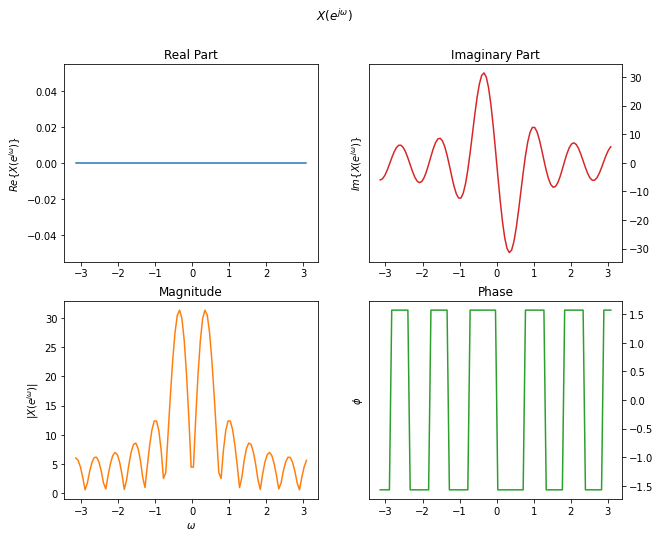

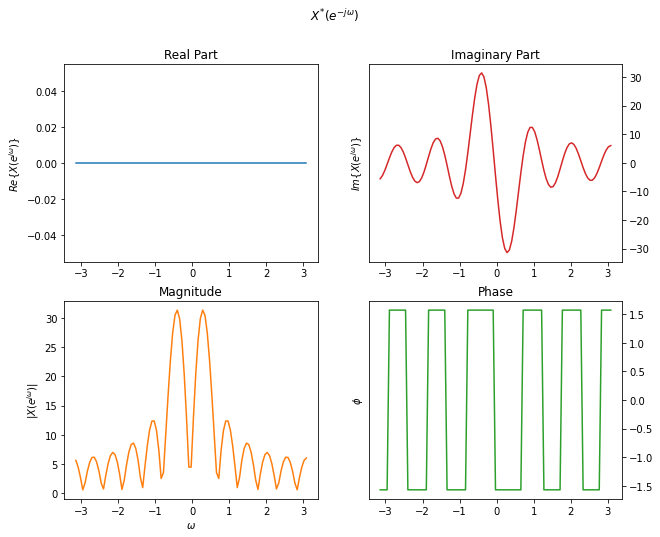

In [17]:
#This below part of script creates a array which represents  
num = 11
linear = np.linspace(-1*num/2, num/2, num+1)
time_stamp = np.linspace(-0.5*num, 0.5*num, num+1)
linear = np.vstack((linear, time_stamp))

dtft_linear = dtft(linear)

#4a
dtft_plotter(dtft_linear, title='$X(e^{j \omega})$')
dtft_plotter(conjugate(negate_dtft(dtft_linear)), title='$X^{*}(e^{-j \omega})$')

##Condition checking
if (dtft_linear == conjugate(negate_dtft(dtft_linear))):
    print("DTFT of the given signal is Conjugate symmentric.")
else:
    print("DTFT of the given signal is Conjugate asymmentric.")

**Question 4(b)**  
>Now here for verifying the result **The DTFT of a real and even signal is real and even**.<br /> 
>
>signal x[n] = cos(n) is been taken You can observe DTFT Plots of both $X(e^{j \omega})$ and $X(e^{-j \omega})$ It very well seen It is the DTFT is real and even.

DTFT of the given signal is Real.
DTFT of the given signal is Even.


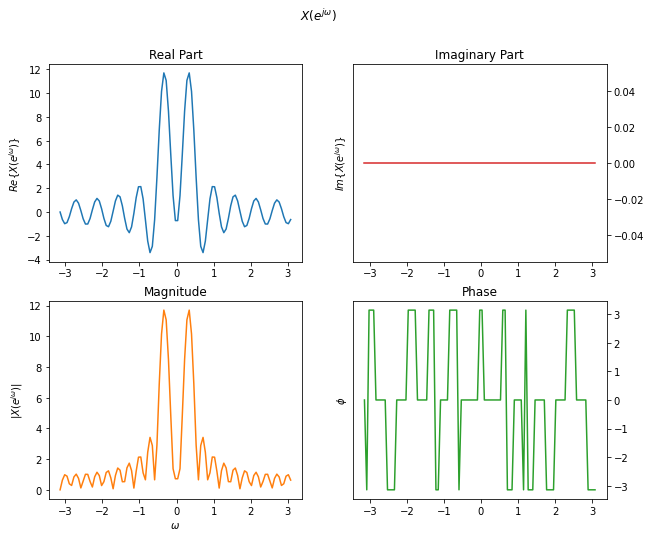

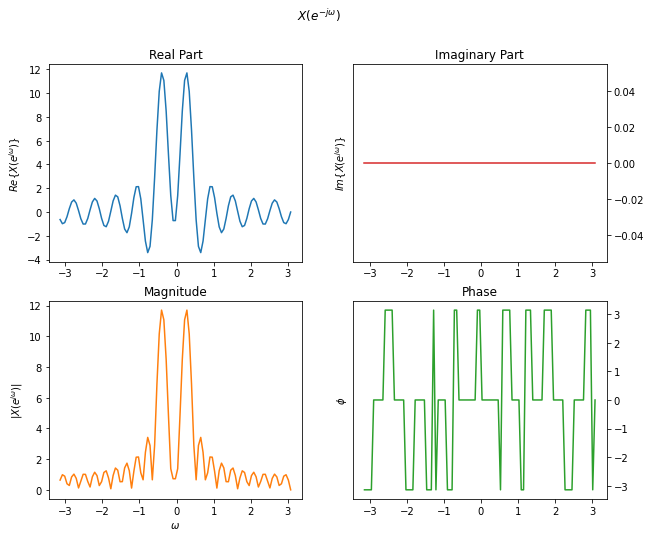

In [18]:
num = 21
t = np.linspace(-np.pi, np.pi, num+1)
cos_signal = np.cos(t)
time_stamp = np.linspace(-0.5*num, 0.5*num, num+1)
cos_signal = np.vstack((cos_signal, time_stamp))

ft_cos = dtft(cos_signal)
#4b
dtft_plotter(ft_cos, title='$X(e^{j \omega})$')
dtft_plotter(negate_dtft(ft_cos), title='$X(e^{-j \omega})$')


if (bool(np.sum(np.isreal(ft_cos['complex'])))):
    print("DTFT of the given signal is Real.")
else:
    print("DTFT of the given signal is Complex.")
    
if (bool(np.sum(ft_cos == negate_dtft(ft_cos)))):
    print("DTFT of the given signal is Even.")
else:
    print("DTFT of the given signal is Odd.")

**Question 4(c)** <br />
>Now here for verifying the result **The DTFT of a real and odd signal is imaginary and odd**.<br />
>
>signal x[n] = sin(n) is been taken You can observe DTFT Plots of both $X(e^{j \omega})$ and $X(e^{-j \omega})$ It very well seen that its DTFT is purely imaginary and odd.

DTFT of the given signal is purely imaginary


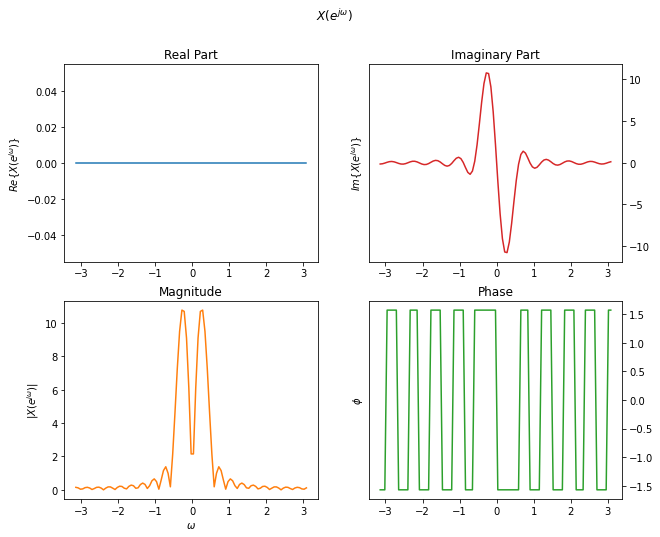

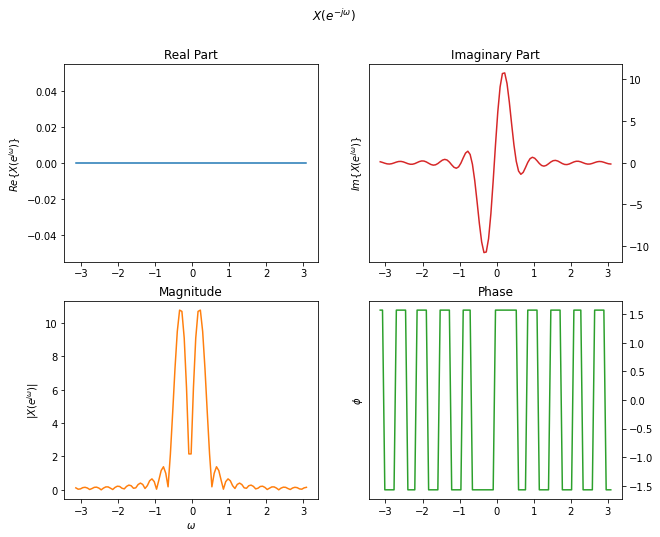

In [19]:
sin_signal = np.sin(t)
sin_signal = np.vstack((sin_signal, time_stamp))
ft_sin = dtft(sin_signal)

#4c
dtft_plotter(ft_sin, title='$X(e^{j \omega})$')
dtft_plotter(negate_dtft(ft_sin), title='$X(e^{-j \omega})$')

if(np.real(ft_sin['complex']) == 0).all():
    print("DTFT of the given signal is purely imaginary")
else:
    print("DTFT of the given signal is not purely imaginary")

**Question 4(d)**<br /> 
>Now here for verifying the result **The DTFT is conjugate odd symmetric for purely imaginary signals**.<br />
>
>signal x[n] = jcos(n) is been taken You can observe DTFT Plots of both $X(e^{j \omega})$ and $X^{0}(e^{-j \omega})$ It very well seen that its DTFT is conjugate asymmetric.

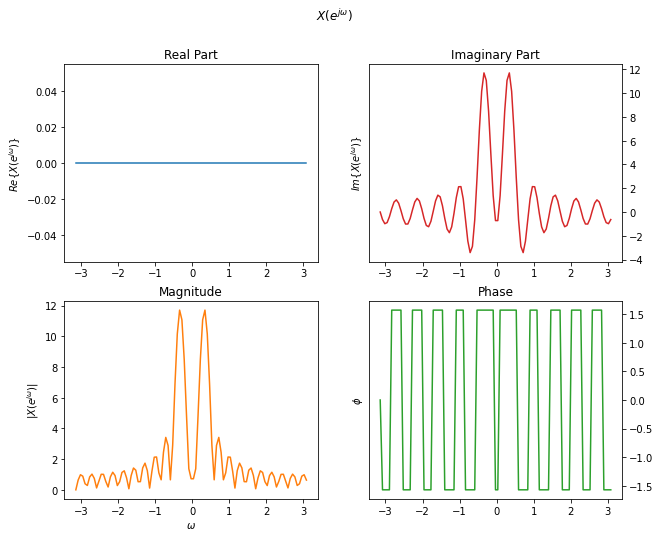

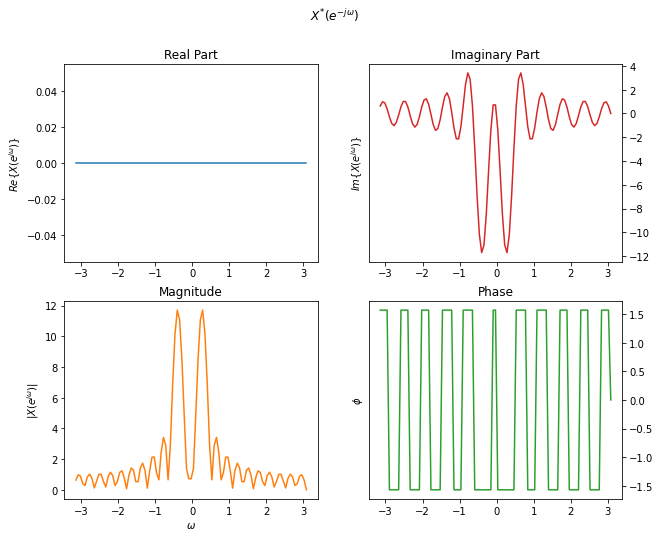

In [20]:
complex_cos_signal = 1j*np.cos(t)
complex_cos_signal = np.vstack((complex_cos_signal, time_stamp))
ft_cos_complex = dtft(complex_cos_signal)

#4d
dtft_plotter(ft_cos_complex, title='$X(e^{j \omega})$')
dtft_plotter(conjugate(negate_dtft(ft_cos_complex)), title='$X^{*}(e^{-j \omega})$')

**Question 4(e)** <br />
>Now here for verifying the result **The DTFT of a imaginary and odd signal is imaginary and even**.<br />
>
>signal x[n] = sin(n) is been taken You can observe DTFT Plots of both $X(e^{j \omega})$ and $X(e^{-j \omega})$ It very well seen that its DTFT is purely imaginary and odd.

DTFT of the given signal is purely imaginary
DTFT of the given signal is Even


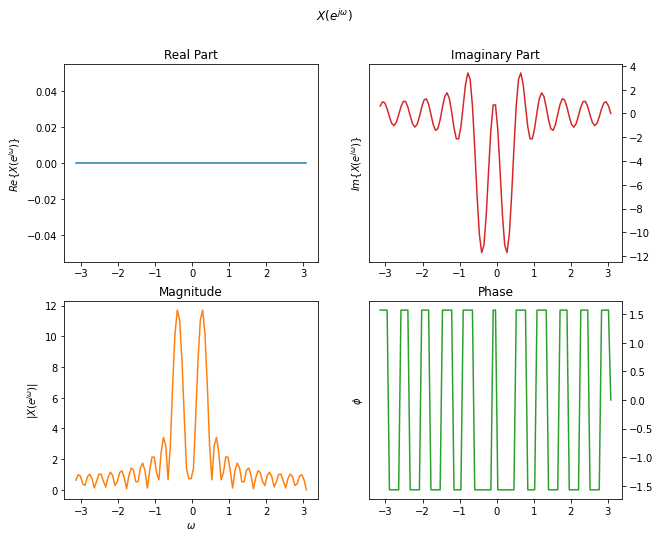

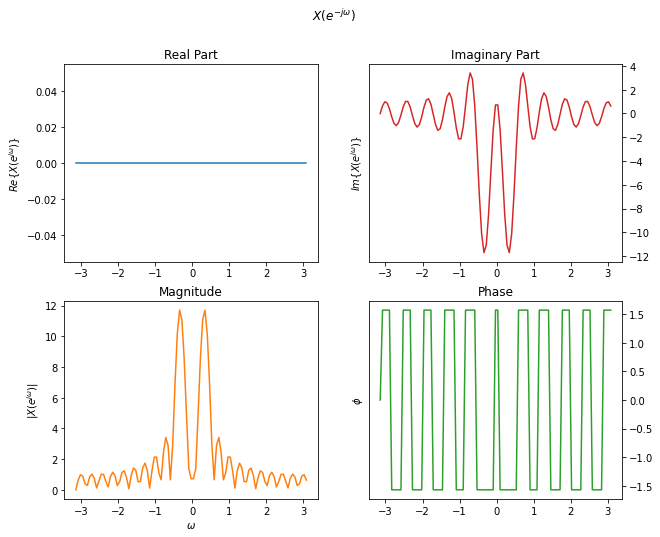

In [21]:
#4e
dtft_plotter(ft_cos_complex, title='$X(e^{j \omega})$')
dtft_plotter(negate_dtft(ft_cos_complex), title='$X(e^{-j \omega})$')

if(np.real(ft_sin['complex']) == 0).all():
    print("DTFT of the given signal is purely imaginary")
else:
    print("DTFT of the given signal is not purely imaginary")
    
if (ft_cos_complex == negate_dtft(ft_cos_complex)):
    print("DTFT of the given signal is Even")
else:
    print("DTFT of the given signal is Odd")

**Question 4(f)** 
>Now here for verifying the result **The DTFT of an imaginary and odd signal is real and odd**.
>
>again signal x[n] = jsin(n) is been taken You can observe DTFT Plots of both $X(e^{j \omega})$ and $X(e^{-j \omega})$ It very well seen that its DTFT is real and odd.

DTFT of the given signal is Real


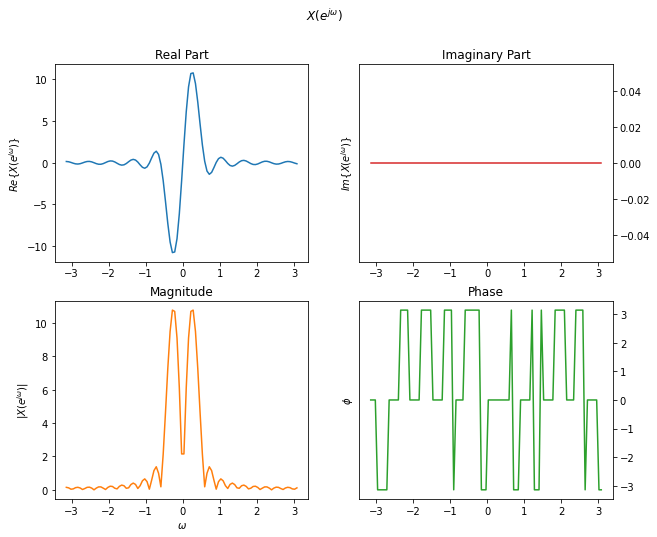

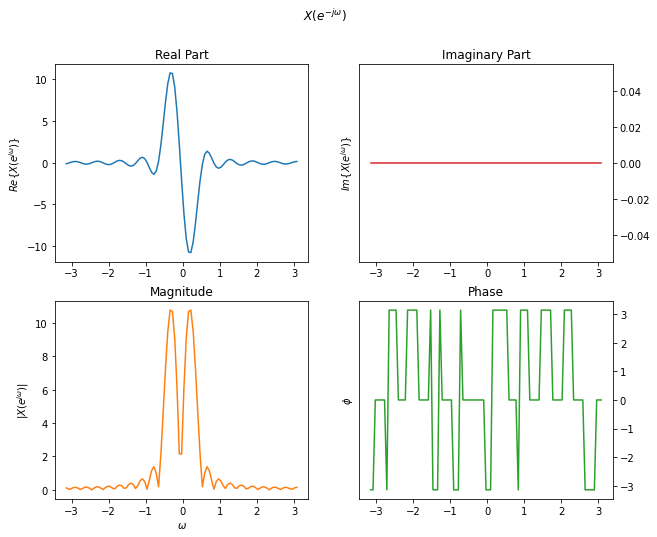

In [22]:
complex_sin_signal = 1j*np.sin(t)
complex_sin_signal = np.vstack((complex_sin_signal, time_stamp))
ft_sin_complex = dtft(complex_sin_signal)

#4f
dtft_plotter(ft_sin_complex, title='$X(e^{j \omega})$')
dtft_plotter(negate_dtft(ft_sin_complex), title='$X(e^{-j \omega})$')

if (np.isreal(ft_sin_complex['complex'])).all():
    print("DTFT of the given signal is Real")
else:
    print("DTFT of the given signal is Complex")

In [23]:
#This below function will take a file as .wav audio file as input and that verbose default parameter which will
#helpful for printing Specifications of audio file such as #frames, framerate, duration, etc.
#Output of this function will return audio signal array, time duration and Number of frames

def wavfile_to_nparray(FILE, verbose=0):
    audio_file = wave.open(FILE, 'rb')             #Opening the .wav file
    params = audio_file.getparams()                #Getting parameters of the audio file
    audio_frame = audio_file.readframes(-1)        #Reading all frames of the audio file 
    audio = np.zeros(params[3])                    #Creating an empty array for storing the values
    
    # Since the frames are3 being stores as bytes format each value will be a size of 1Byte(*bits)
    # Thus we get values ranging from 0 to 255
    # To avoid large values of dtft magnitude so we are normalizing signal from -1 to 1 
    # the audio signal to have better representation in time domain
    
    for i in range(len(audio_frame)):              
        audio[i] = audio_frame[i]                  #Storing the byte value in int array
        
    audio = audio/2**7 -1                          #Normalizing from  -1 to 1
    duration = params[3]/params[2]                 #Time duration of the signal
    if verbose:
        print('Channels=',params[0], ', SampleWidth=', params[1],'\bbytes' 
              ,', Framerate=', params[2], '\bHz', ', Frames=', params[3], '\nDuration:', duration, '\bs\n')
    return audio, duration, params[3]

#This below function will Plot the Time signal. Computes DTFT and also plots Magnitude and phase

def analyise_wav_file(file):
    audio, t, frames = wavfile_to_nparray(file, verbose=1)
    time = np.linspace(0, t, frames)
    
    dtft_audio = dtft(audio, N=1000)
    
    plt.rcParams['figure.figsize'] = [20, 4]
    plt.figure()                                            #Plotting Time signal
    plt.title(file, fontsize='large', fontweight='bold')
    plt.plot(time, audio, color='green')

                                                            #Plotting Magnitude and Phase
    fig, (ax1, ax2) = plt.subplots(1,2)
    plt.suptitle("DTFT of "+file)
    ax1.title.set_text('Magnitude')
    ax1.plot(dtft_audio['omega'], dtft_audio['magnitude'])
    ax1.set(xlabel='$\omega$', ylabel='$|X(e^{j \omega})|$')

    ax2.title.set_text('Phase')
    ax2.set(xlabel='$\omega$', ylabel='$\phi$')
    ax2.plot(dtft_audio['omega'], dtft_audio['phase'], 'tab:red')

Channels= 1 , SampleWidth= 1 bytes , Framerate= 11025 Hz , Frames= 5397 
Duration: 0.4895238095238095 s



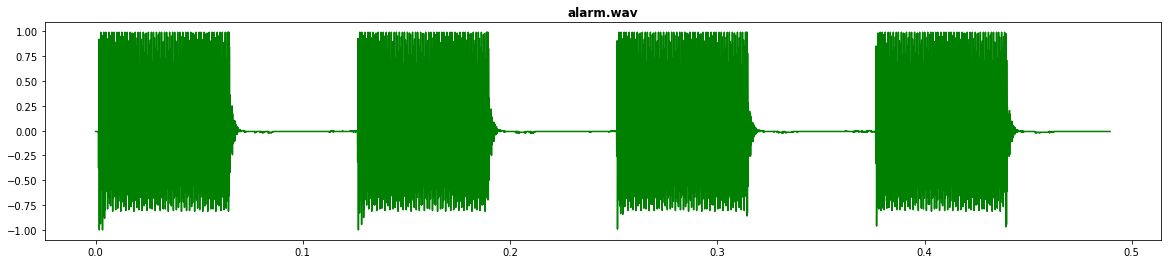

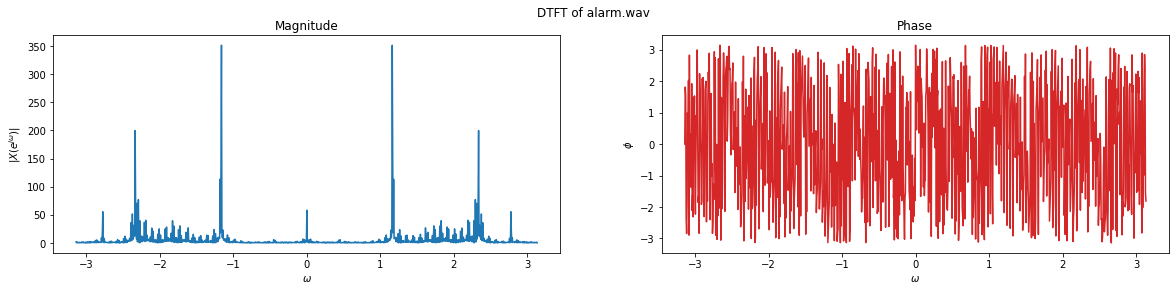

In [24]:
##### To have accurate DTFT more points in omega has been taken. IT WOULD TAKE SOME TIME TO COMPUTE #### 

audio_file = 'alarm.wav'

analyise_wav_file(audio_file)

# For this audio we can see that three omega components with significant amplitude and one at 0rad/s rest all
# very less amplitude.
# Specificaly at one omega we have maximum amplitude thus we can assume that alarm is being rang at that frequecy

Channels= 1 , SampleWidth= 1 bytes , Framerate= 11025 Hz , Frames= 27505 
Duration: 2.4947845804988664 s



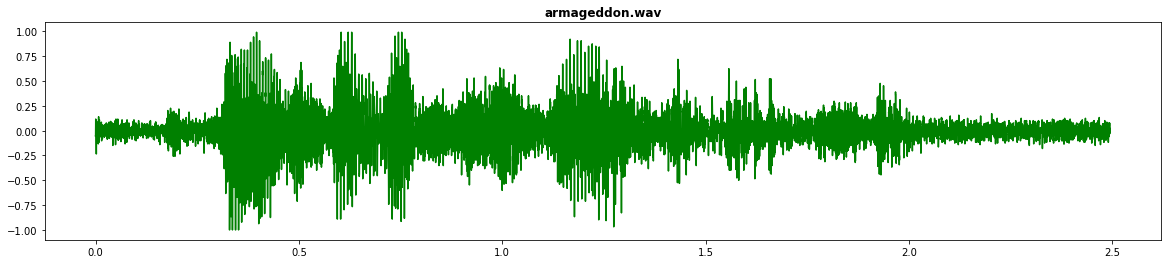

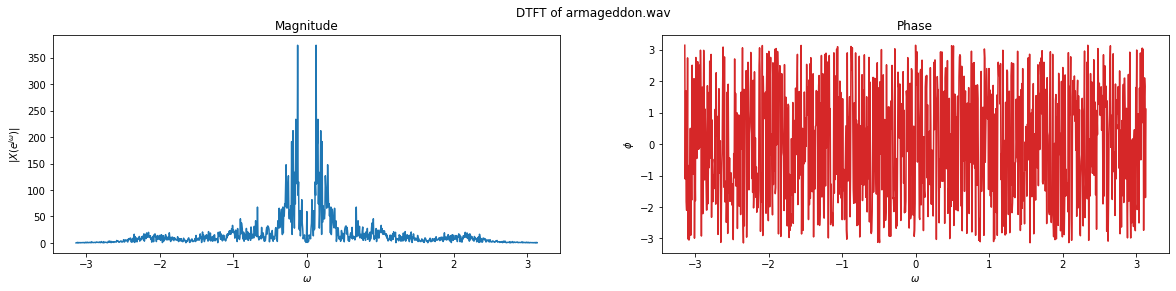

In [25]:
audio_file = 'armageddon.wav'

analyise_wav_file(audio_file)

# For this audio we can see that one omega positive components with significant amplitude rest are having not so
# high amplitude but significant amount. Mostly we can say that these are having frequencies of human voice 

Channels= 1 , SampleWidth= 1 bytes , Framerate= 11025 Hz , Frames= 18476 
Duration: 1.675827664399093 s



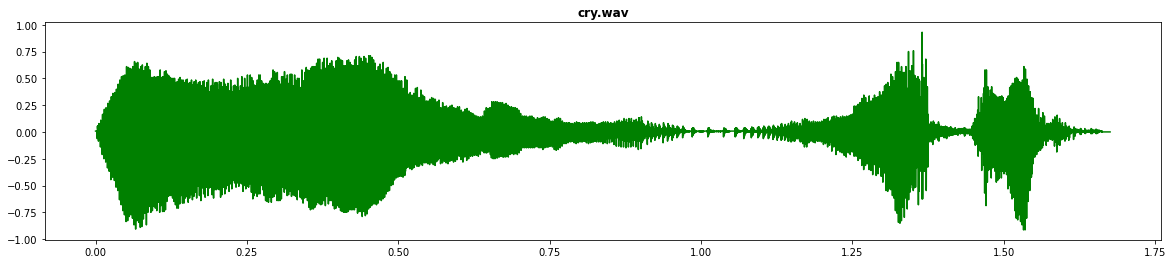

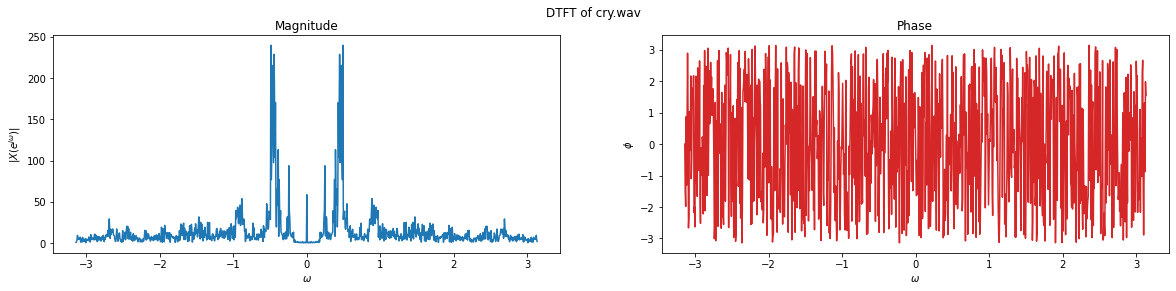

In [26]:
audio_file = 'cry.wav'

analyise_wav_file(audio_file)

# For this audio we can see that one omega components with significant amplitude rest all
# very less amplitude

Channels= 1 , SampleWidth= 1 bytes , Framerate= 11025 Hz , Frames= 15509 
Duration: 1.4067120181405897 s



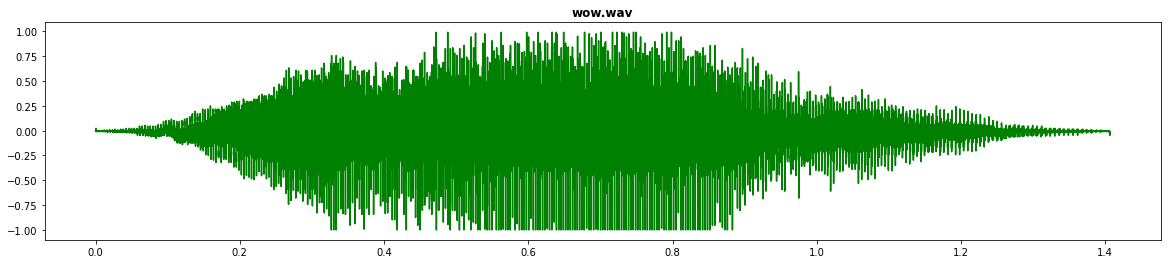

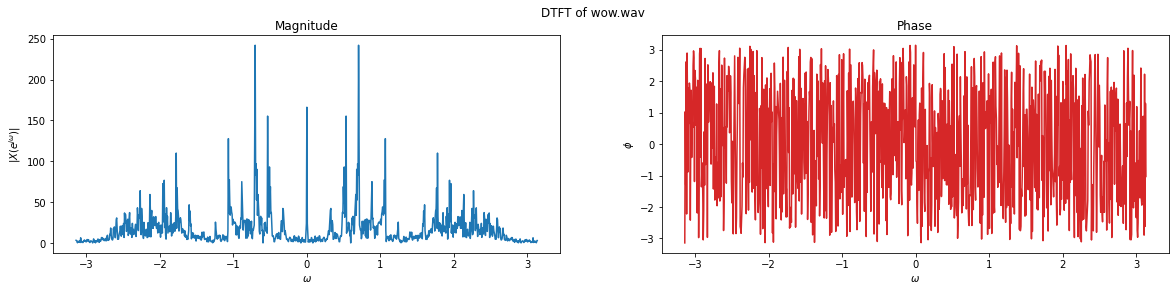

In [27]:
audio_file = 'wow.wav'

analyise_wav_file(audio_file)

# For this audio we can see that many omega components with significant amplitude rest all
# very less amplitude. We can say that these are having high pitch sounds